In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from mockseries.mockseries import Measure, datetime_range

NAME = "light"  # es.: "temperature", "soil_humidity", "pH", "light"

now = pd.Timestamp.now()
start = pd.Timestamp(year=now.year, month=1, day=1)
end   = pd.Timestamp(year=now.year + 1, month=1, day=1)
idx = datetime_range(timedelta(hours=1), start, end)

m = Measure.from_json(NAME)
s = m.generate(NAME, idx)
s = s.astype(float)
s.head()

2025-01-01 00:00:00     0.845969
2025-01-01 01:00:00     0.000000
2025-01-01 02:00:00     8.894287
2025-01-01 03:00:00    14.375063
2025-01-01 04:00:00     0.799713
Freq: h, dtype: float64

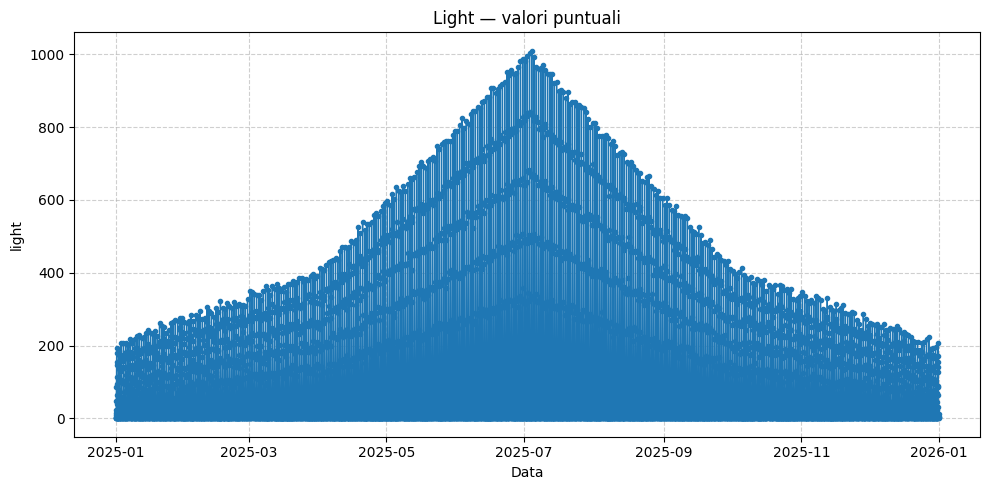

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(s.index, s.values, marker='.', linewidth=1)
plt.title(f"{NAME.capitalize()} — valori puntuali")
plt.xlabel("Data")
plt.ylabel(NAME)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

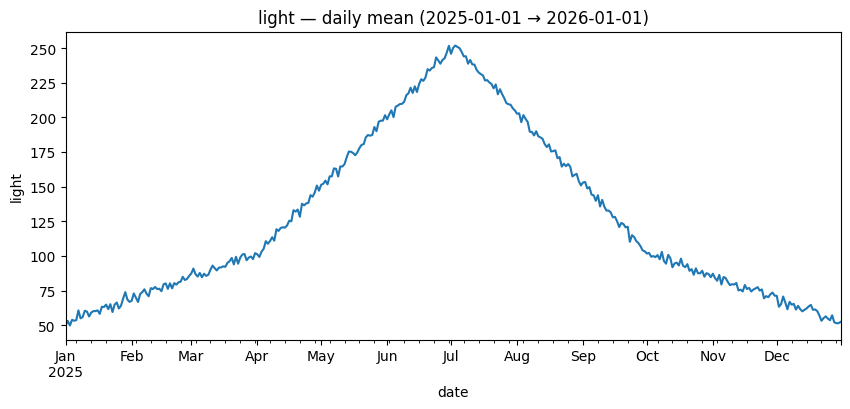

In [18]:
sd = s.resample("1d").mean()
ax = sd.plot(figsize=(10, 4))
ax.set_title(f"{NAME} — daily mean ({start.date()} → {end.date()})")
ax.set_xlabel("date"); ax.set_ylabel(NAME)
plt.show()

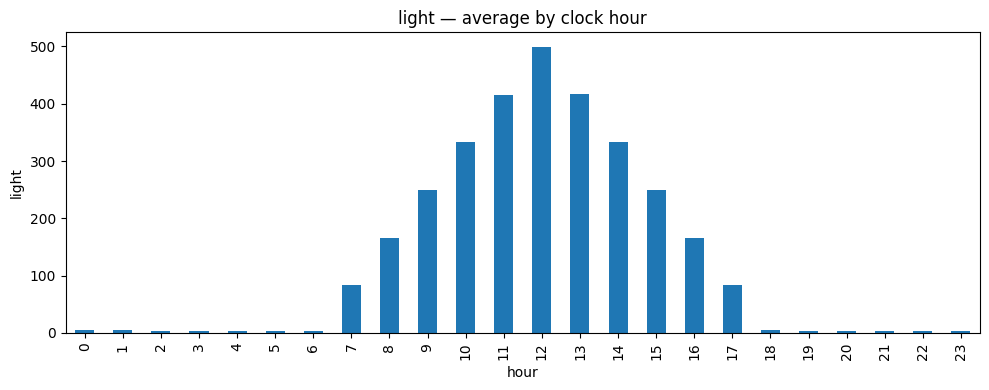

In [19]:
hourly_mean_by_clock = s.groupby(s.index.hour).mean()
ax = hourly_mean_by_clock.plot(kind="bar", figsize=(10, 4))
ax.set_title(f"{NAME} — average by clock hour")
ax.set_xlabel("hour"); ax.set_ylabel(NAME)
plt.tight_layout(); plt.show()